Documentation

Basic Steps
    -> Install Python
    - Download all files you want to analyze
    - Know the path locations of the files and folders you want to analyze (https://www.youtube.com/watch?v=QZUpzuQ0X5I)

In [27]:
#testing, ignore

import pandas as pd

df = pd.read_csv('testMM.csv')

df_emojis = df.drop(df.columns[[0, 11, 12]],axis = 1)
df_emojis.iloc[:, 0] = df_emojis.iloc[:, 0].str.replace(' - Yes! I can very well understand how the user feels about the problem.', '')

df_emojis

,"While solving a problem, I clearly know who the user/user group is, and I can understand and express how the user feels about the problem.",Researching online or talking to subject matter experts (eg Bird scientists) is valuable for getting additional insights into any problem.,"When I have a question, I try to find the answer by participating in the classroom or team discussions.",I think about many possible solutions and share my ideas with the team I am a part of.,"I listen to feedback from others, and when applicable, I use feedback to improve the solution I come up with.",I understand the ideas and thoughts of others.,"When working in a team, I am willing to pick the best ideas generated together by our team. Even if my idea is not included I actively engage with my team to solve problems.","When I give feedback, I try to communicate respectfully with helpful language. (Eg""I like, I wish, What if?"")","While working in a team, I try to make sure every member's roles and responsibilities are clearly identified.","I make sure that the final prototype meets at least one need of the user group, and thus I made an impact through my/our design."
0,🤩,🤩,🤩,🤩,🤩,🙂,🙂,🙂,🤩,🙂
1,🤩,🤩,🤩,🙂,😐,🤩,🤩,🤩,🤩,🤩
2,🤩,🤩,🙂,🤩,😐,🙂,🤩,🙂,🤩,🤩
3,🤩,🤩,🤩,🙂,🤩,🙂,🙂,🙂,🙂,🙂
4,🤩,🙂,🙂,🙂,🙂,🤩,🙂,🤩,🤩,🙂
...,...,...,...,...,...,...,...,...,...,...
93,Total student count,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,I have learned and applied Design Thinking in ...,10.20%,5,49,NaN,NaN,NaN,NaN,NaN,NaN
95,I have learned and applied Design Thinking in ...,36.73%,18,49,NaN,NaN,NaN,NaN,NaN,NaN
96,Never. This is my first time learning and appl...,59.18%,29,49,NaN,NaN,NaN,NaN,NaN,NaN


TASK 1

To use this code, run the code box below this function, entering the path you copied for a single specific file

This code will return a Pandas dataframe representing the classroom score for a single classroom.


In [107]:
import pandas as pd

def classroom_score(df):
    '''
    Return Value: a pandas dataframe with the classroom scores in them
    Argument: pandas dataframe to read data from
    '''

    df_tidy = df

    df_emojis = df_tidy.drop(df_tidy.columns[[0, 11, 12]],axis = 1)
    df_emojis.iloc[:, 0] = df_emojis.iloc[:, 0].str.replace(' - Yes! I can very well understand how the user feels about the problem.', '')
    df_emojis.iloc[:, 0] = df_emojis.iloc[:, 0].str.replace(' - Yes! I can very well understand how the user feels about the problem', '')
    df_emojis.iloc[:, 0] = df_emojis.iloc[:, 0].str.replace(' - No. I cannot understand how the user feels about the problem.', '')


    df_counters = pd.DataFrame(index=["🤩", "🙂", "😐", "🙁", 'Totals'],columns=range(10))


    for i in range(0, len(df_emojis.columns)):
        #print(df_emojis.columns)
        df_counters.at['🙂', i] = (df_emojis[df_emojis.columns[i]] == '🙂').sum()
        df_counters.at['🤩', i] = (df_emojis[df_emojis.columns[i]] == '🤩').sum()
        df_counters.at['😐', i] = (df_emojis[df_emojis.columns[i]] == '😐').sum()
        df_counters.at['🙁', i] = (df_emojis[df_emojis.columns[i]] == '🙁').sum()

        #doesn't count the one bottom row, first column

    for i in range(0, len(df_emojis.columns)):
        df_counters.at['Totals', i] = df_counters[i].sum(axis = 0)

    df_counters= df_counters.astype(float)

    #print(df_counters)

    df_scores = pd.DataFrame(index=['Enhanced Empathy', 'Growth Mindset', 'Radical Collaboration', 'Problem Solving'],columns=['Avg Score'])

    ee = ((((df_counters[0][0] + df_counters[1][0]) * 4) + ((df_counters[0][1] + df_counters[1][1]) * 3) + ((df_counters[0][2] + df_counters[1][2]) * 2) + ((df_counters[0][3] + df_counters[1][3]) * 1))/(df_counters[0]['Totals'] * 8)) * 4

    gm = ((((df_counters[2][0] + df_counters[3][0] + df_counters[4][0]) * 4) + ((df_counters[2][1] + df_counters[3][1] + df_counters[4][1]) * 3) + ((df_counters[2][2] + df_counters[3][2] + df_counters[4][2]) * 2) + ((df_counters[2][3] + df_counters[3][3] + df_counters[4][3]) * 1))/(df_counters[0]['Totals'] * 12)) * 4

    rc = ((((df_counters[5][0] + df_counters[6][0] + df_counters[7][0]) * 4) + ((df_counters[5][1] + df_counters[6][1] + df_counters[7][1]) * 3) + ((df_counters[5][2] + df_counters[6][2] + df_counters[7][2]) * 2) + ((df_counters[5][3] + df_counters[6][3] + df_counters[7][3]) * 1))/(df_counters[0]['Totals'] * 12)) * 4

    ps = ((((df_counters[8][0] + df_counters[9][0]) * 4) + ((df_counters[8][1] + df_counters[9][1]) * 3) + ((df_counters[8][2] + df_counters[9][2]) * 2) + ((df_counters[8][3] + df_counters[9][3]) * 1))/(df_counters[0]['Totals'] * 8)) * 4

    df_scores.at['Enhanced Empathy', 'Avg Score'] = round(ee, 2)
    df_scores.at['Growth Mindset', 'Avg Score'] = round(gm, 2)
    df_scores.at['Radical Collaboration', 'Avg Score'] = round(rc, 2)
    df_scores.at['Problem Solving', 'Avg Score'] = round(ps, 2)

    return df_scores

Comment out the bottom code and uncomment the top code. Then replace the string with the path of the file. Use this basic rule for the rest of the code.

In [ ]:
#classroom_score(pd.read_excel('enter you path here as a string!'))

classroom_score(pd.read_excel('testMM_3.xlsx'))

TASK 2

In [ ]:


import os
import os.path
import shutil
import pandas as pd

def trend_class(path):
    '''Return a dict showing the 4 classroom score values for 4 different lessons given the path of the folder of the classroom'''

#all_files = os.walk("./Shirakawa Elementary-Stacy Divine")
    AllFiles = list(os.walk(path))
    #print(AllFiles)
    all_words = path.split('\\')
    #print(all_words)
    name = all_words[-2]

    results = {'MBCD':[], 'TD':[], 'LRBD':[], 'RCD':[]}

    for item in AllFiles:
         
         foldername, LoDirs, LoFiles = item

         for filename in LoFiles:
            
            fullfilename = foldername + "/" + filename
            #print(fullfilename)
            if name.lower() == filename[0:len(name)].lower():
                #f = open(filename, "r")
                if filename[-4:] == 'xlsx':
                    df_tidy = pd.read_excel(fullfilename)
                elif filename[-3:] == 'csv':
                    df_tidy = pd.read_csv(fullfilename)
                
                #print(classroom_score(df_tidy))
                if 'MBCD' in filename:
                    results['MBCD'] = classroom_score(df_tidy)
                elif 'TD' in filename:
                    results['TD'] = classroom_score(df_tidy)
                elif 'LRBD' in filename:
                    results['LRBD'] = classroom_score(df_tidy)
                elif 'RCD' in filename:
                    results['RCD'] = classroom_score(df_tidy)

    return results


{'MBCD':                       Avg Score
 Enhanced Empathy           3.51
 Growth Mindset             3.34
 Radical Collaboration      3.35
 Problem Solving            3.38,
 'TD':                       Avg Score
 Enhanced Empathy           3.56
 Growth Mindset             3.19
 Radical Collaboration      3.41
 Problem Solving            3.47,
 'LRBD':                       Avg Score
 Enhanced Empathy            3.4
 Growth Mindset             3.29
 Radical Collaboration      3.34
 Problem Solving            3.32,
 'RCD':                       Avg Score
 Enhanced Empathy           3.37
 Growth Mindset             3.22
 Radical Collaboration      3.31
 Problem Solving             3.4}

In [ ]:
#ignore, helper function

def getDataList(results, lesson):
    
    #print(results[lesson])

    data = results[lesson]['Avg Score']
    return data

getDataList(trend_class('E:\HMC CS35\Final Project\TITLE-1 PARTNER SCHOOLS\SHIRAKAWA\Shirakawa Elementary-Stacy Divine'), 'RCD')

To use this code, run the code box below this function, entering the path you copied for full folder

This code will return a bar graph visually representing the 4 classroom scores.

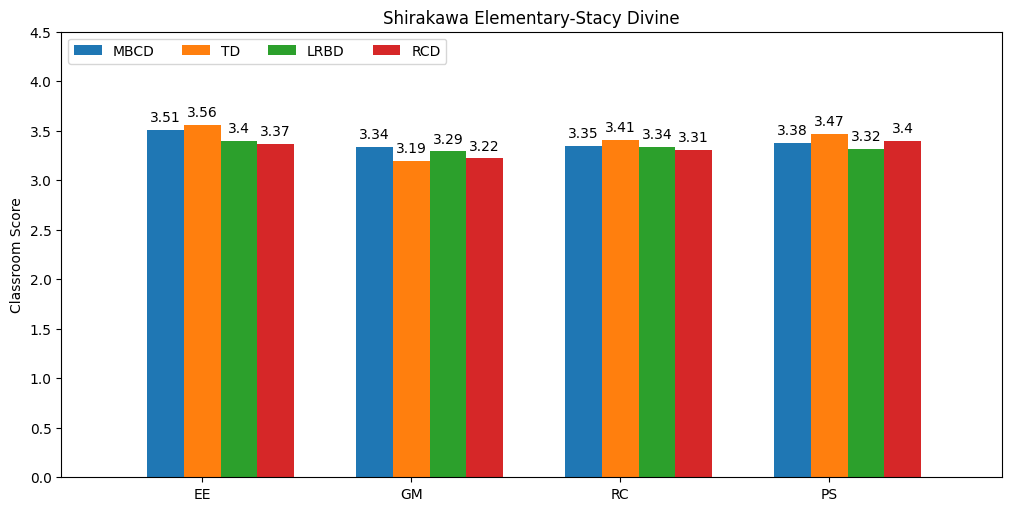

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

def trend_graph(classroom):
    '''
    classroom: path of the desired classroom
    '''

    criteria = ('EE', 'GM', 'RC', 'PS')
    classroom_data = {
        'MBCD': tuple(trend_class(classroom)['MBCD']['Avg Score']),
        'TD': tuple(trend_class(classroom)['TD']['Avg Score']),
        'LRBD': tuple(trend_class(classroom)['LRBD']['Avg Score']),
        'RCD': tuple(trend_class(classroom)['RCD']['Avg Score'])
    }

    x = np.arange(len(criteria))*2  # the label locations
    #print(f"x is : {x}")
    width = 0.35  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(figsize=(10,5), layout='constrained')

    for attribute, measurement in classroom_data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=4)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Classroom Score')
    ax.set_title(classroom.split('\\')[-1])
    ax.set_xticks(x + width, criteria)
    ax.legend(loc='upper left', ncols=4)
    ax.set_ylim(0, 4.5)
    ax.set_xlim(-1, 8)

    plt.show()

trend_graph('E:\HMC CS35\Final Project\TITLE-1 PARTNER SCHOOLS\SHIRAKAWA\Shirakawa Elementary-Stacy Divine')

In [ ]:
#trend_graph('ENTER YOUR PATH HERE AS A STRING!')

trend_graph('E:\HMC CS35\Final Project\TITLE-1 PARTNER SCHOOLS\SHIRAKAWA\Shirakawa Elementary-Stacy Divine')

TASK 3

In [108]:
# ignore helper function

import os
import os.path
import shutil
import pandas as pd

def get_all(path):
    '''Return LoL showing scores in each of the 4 criteria given path of '''

#all_files = os.walk("./Shirakawa Elementary-Stacy Divine")
    AllFiles = list(os.walk(path))
    #print(AllFiles)
    #print(all_words)

    results = {'EE':[], 'GM':[], 'PS':[], 'RC':[]}

    for item in AllFiles:
         #print(item)
         foldername, LoDirs, LoFiles = item

         for filename in LoFiles:
            
            fullfilename = foldername + "/" + filename
            #print(fullfilename)
            #print(f"fielname is {filename}")
            
            if 'Student Self-Reflection' in filename:
                if filename[-4:] == 'xlsx':
                    df_tidy = pd.read_excel(fullfilename)
                elif filename[-3:] == 'csv':
                    df_tidy = pd.read_csv(fullfilename)
            
                if 'MBCD' in filename:
                        results['EE'].append(classroom_score(df_tidy)['Avg Score'][0])
                elif 'TD' in filename:
                        results['GM'].append(classroom_score(df_tidy)['Avg Score'][1])
                elif 'LRBD' in filename:
                        results['RC'].append(classroom_score(df_tidy)['Avg Score'][2])
                elif 'RCD' in filename:
                        results['PS'].append(classroom_score(df_tidy)['Avg Score'][3])
    
    results['PS'].append(classroom_score(df_tidy)['Avg Score'][3])
    results['PS'].append(classroom_score(df_tidy)['Avg Score'][3])
    return results

get_all('E:\HMC CS35\Final Project\TITLE-1 PARTNER SCHOOLS')

{'EE': [3.48, 3.5, 3.2, 3.21, 2.91, 3.35, 3.59, 3.34, 3.42, 3.17, 3.51, 3.31],
 'GM': [3.27,
  3.08,
  3.26,
  3.22,
  2.65,
  3.56,
  3.64,
  3.37,
  3.16,
  3.28,
  3.19,
  3.35],
 'PS': [3.4, 3.13, 3.56, 3.31, 2.82, 3.41, 3.44, 3.16, 3.4, 3.6, 3.44, 3.44],
 'RC': [3.4, 3.09, 3.21, 3.22, 2.67, 3.36, 3.55, 3.22, 3.08, 3.32, 3.34, 3.27]}

In [167]:
import matplotlib.pyplot as plt
import numpy as np
  
def graph_all(path):
    '''Show 4 graphs showing scores in each of the 4 criteria given path'''

    data = get_all(path)

    # Define X and Y variable data
   # X = np.array(range(1, 13))
    Y1 = np.asarray(data['EE'])
    Y2 = np.asarray(data['GM'])
    Y3 = np.asarray(data['PS'])
    Y4 = np.asarray(data['RC'])

    figure, axis = plt.subplots(2, 2, figsize=(10, 10))

    axis[0, 0].hist(Y1, bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4], ec = 'black')
    axis[0, 0].set_title("EE")
    axis[0, 0].set_xlabel("Classroom Score (0 to 4)")
    axis[0, 0].set_ylabel("Frequency")

    

    axis[0, 1].hist(Y2, bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4], ec = 'black')
    axis[0, 1].set_title("GM")
    axis[0, 1].set_xlabel("Classroom Score (0 to 4)")
    axis[0, 1].set_ylabel("Frequency")
    

    axis[1, 0].hist(Y3, bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4], ec = 'black')
    axis[1, 0].set_title("PS")
    axis[1, 0].set_xlabel("Classroom Score (0 to 4)")
    axis[1, 0].set_ylabel("Frequency")

    

    axis[1, 1].hist(Y4, bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4], ec = 'black')
    axis[1, 1].set_title("RC")
    axis[1, 1].set_xlabel("Classroom Score (0 to 4)")
    axis[1, 1].set_ylabel("Frequency")



    figure.tight_layout(pad=3.0)
    
    # Combine all the operations and display
    plt.show()
    
    #print(data)

To use this code, run the code box below this function, entering the path you copied for full folder

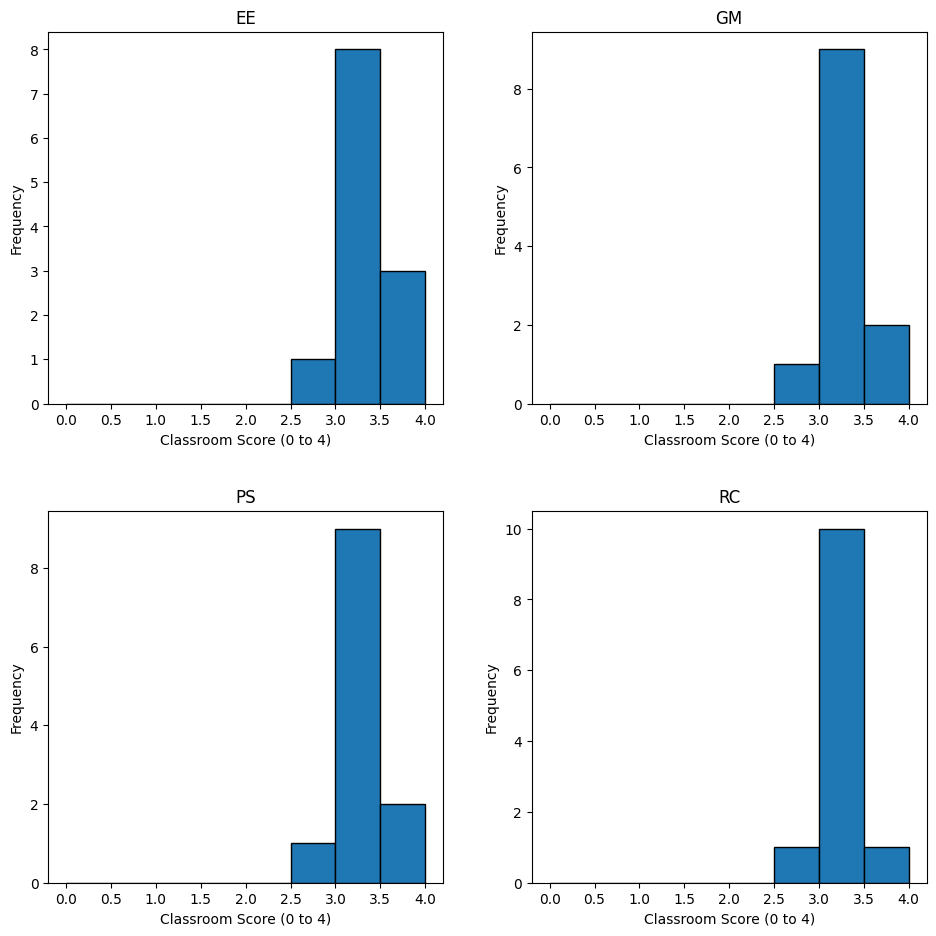

In [168]:
#graph_all('ENTER YOUR PATH HERE')

graph_all('E:\HMC CS35\Final Project\TITLE-1 PARTNER SCHOOLS')

TASK 4

In the place of "insert key here" add your ChatGPT key - don't use unless willing to spend money

In [5]:
#caution when using this function, remember to never leak your key

import openai
openai.api_key = "insert key here"

def sentiment_analysis(transcription):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        temperature=0,
        messages=[
            {
                "role": "system",
                "content": "As an AI with expertise in language and emotion analysis, your task is to return a JSON object with a score from -1 to 1, representing the sentiment of the following text."
            },
            {
                "role": "user",
                "content": transcription
            }
        ]
    )
    return response['choices'][0]['message']['content']

In [ ]:
#ignore, helper
'''
import json

def sentiment_map(text):
    a = sentiment_analysis(text)

    b = json.loads(a)

    return b['score']
'''

In [3]:
from textblob import TextBlob

def sentiment_map(text):
    a = TextBlob(text).sentiment.polarity
    return a

In [91]:
sentiment_map("I liked working with the team")

0.6

In [95]:
#optional code, not needed

import pandas as pd

def sentiment(df):
    '''
    Return a dataframe with sentiment analysis
    Argument: pandas datafrane to analyze
    '''
    
    df_tidy = df.dropna()
    
    df["Sentiment"] = df["What did you learn and enjoy from this lesson? (Write at least three complete sentences.)"].map(sentiment_map)

    return (df)

In [101]:
import matplotlib.pyplot as plt
import numpy as np

def graph_sentiment(df):
    '''Graphs the sentiment of a particular class
    Argument: dataframe containing sentiment values'''

    df["Sentiment"] = df["What did you learn and enjoy from this lesson? (Write at least three complete sentences.)"].map(sentiment_map)

    array = df["Sentiment"].to_numpy()
    #array = array +1 

    
    fig, ax = plt.subplots(figsize =(10, 10))

    plt.title('Sentiment Analysis')
    plt.xlabel('Sentiment Value (-1 to 1)')
    plt.ylabel('Frequency')

    ax.hist(array, bins = [-1, -0.5, 0, 0.5, 1], ec = 'black', width = 0.5)
 
# Show plot
    plt.show()

To use this code, run the code box below this function, entering the path you copied for full folder

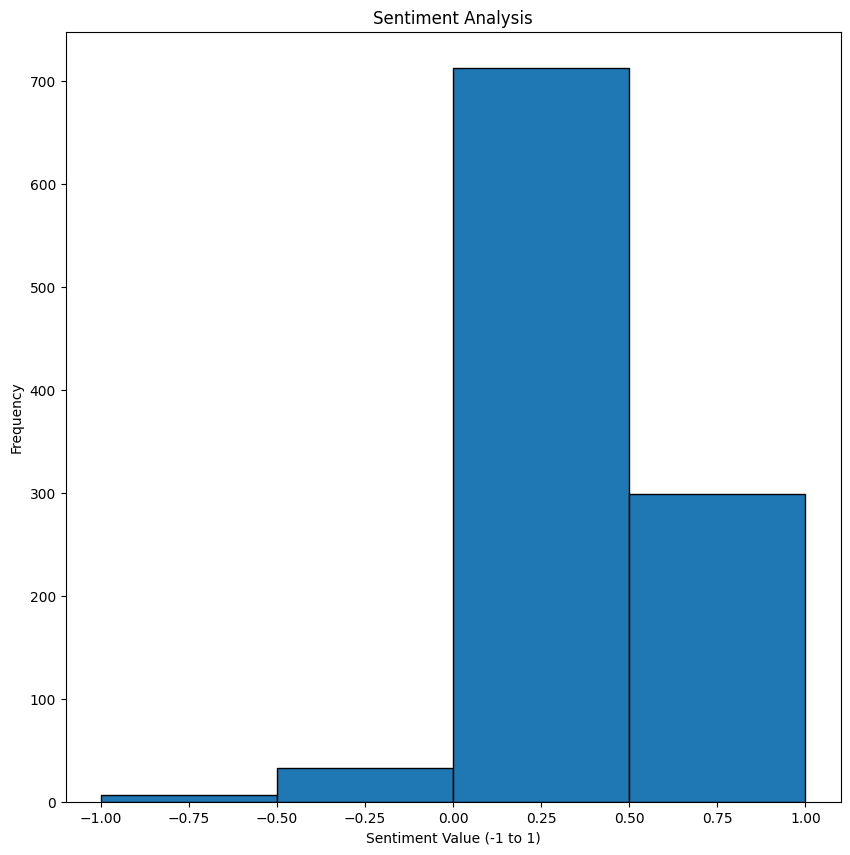

In [103]:
graph_sentiment(pd.read_excel('ENTER YOUR PATH HERE'))
#graph_sentiment(pd.read_csv('Grades 4-8_Student Self-Reflection.csv'))
